## Initial Steps

### Import Libraries needed

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Import the Data

In [2]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/car_data.csv'

df = pd.read_csv(url)

## Data Inspection

### Data Inspect

In [3]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,37200


In [4]:
df.shape

(11914, 15)

### Missing Values and Duplicated

In [5]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
MSRP                    0
dtype: int64

In [6]:
df.isna().mean().multiply(100)

Make                  0.000000
Model                 0.000000
Year                  0.000000
Engine Fuel Type      0.025180
Engine HP             0.579151
Engine Cylinders      0.251805
Transmission Type     0.000000
Driven_Wheels         0.000000
Number of Doors       0.050361
Market Category      31.408427
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
MSRP                  0.000000
dtype: float64

In [7]:
# Not sure if i should remove NA but did it to consider everything
df = df.dropna()
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,50920


In [8]:
df.duplicated().sum()/df.shape[0]

0.043171697179614055

In [9]:
# Remove Duplicates, there is no reason for that in this subset. It is a list of cars and it's price
df = df.drop_duplicates()
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,50920


In [10]:
df.duplicated().sum()/df.shape[0]

0.0

**Rename the Columns (just to be easier)**

In [11]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'MSRP'],
      dtype='object')

In [12]:
df.columns = df.columns.str.lower()

In [13]:
df.columns = df.columns.str.replace(' ','_')

In [14]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'msrp'],
      dtype='object')

In [15]:
# Changing the name mrsp to price just to be easier
df.rename(columns={'msrp':'price'},inplace = True)
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'price'],
      dtype='object')

## EDA

### Univariate Analysis (and remove duplicates)

In [16]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,price
count,7735.00000,7735.000000,7735.000000,7735.000000,7735.00000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,3.421332,26.52980,19.468649,5.102826e+04
std,6.23167,115.529955,1.895593,0.895054,7.78492,7.231534,7.153777e+04
min,1990.00000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000e+03
25%,2010.00000,194.000000,4.000000,2.000000,22.00000,16.000000,2.622500e+04
50%,2015.00000,270.000000,6.000000,4.000000,26.00000,18.000000,3.560000e+04
75%,2016.00000,325.000000,6.000000,4.000000,30.00000,22.000000,4.947750e+04
max,2017.00000,1001.000000,16.000000,4.000000,354.00000,137.000000,2.065902e+06


In [17]:
df.describe([0.005, 0.01, 0.05, 0.1, 0.2, 0.8, 0.9, 0.99, 0.995, 0.999])

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,price
count,7735.00000,7735.000000,7735.000000,7735.000000,7735.00000,7735.000000,7.735000e+03
mean,2012.14958,277.632062,5.825469,3.421332,26.52980,19.468649,5.102826e+04
std,6.23167,115.529955,1.895593,0.895054,7.78492,7.231534,7.153777e+04
min,1990.00000,55.000000,0.000000,2.000000,12.00000,7.000000,2.000000e+03
0.5%,1991.00000,79.000000,3.670000,2.000000,14.00000,9.000000,2.000000e+03
1%,1991.00000,93.000000,4.000000,2.000000,15.00000,10.000000,2.000000e+03
5%,1996.00000,132.000000,4.000000,2.000000,17.00000,12.000000,2.346100e+03
10%,2003.00000,150.000000,4.000000,2.000000,19.00000,13.000000,1.721000e+04
20%,2009.00000,180.000000,4.000000,2.000000,22.00000,15.000000,2.419400e+04
50%,2015.00000,270.000000,6.000000,4.000000,26.00000,18.000000,3.560000e+04


In [18]:
df.year.value_counts()

2016    1624
2015    1613
2017    1243
2014     477
2012     279
2013     277
2009     271
2011     229
2007     222
2010     217
2008     185
2006     102
2005      92
2004      91
2003      88
1993      80
1992      71
2002      71
2001      66
2000      59
1997      57
1994      57
1991      55
1995      51
1996      48
1999      45
1990      34
1998      31
Name: year, dtype: int64

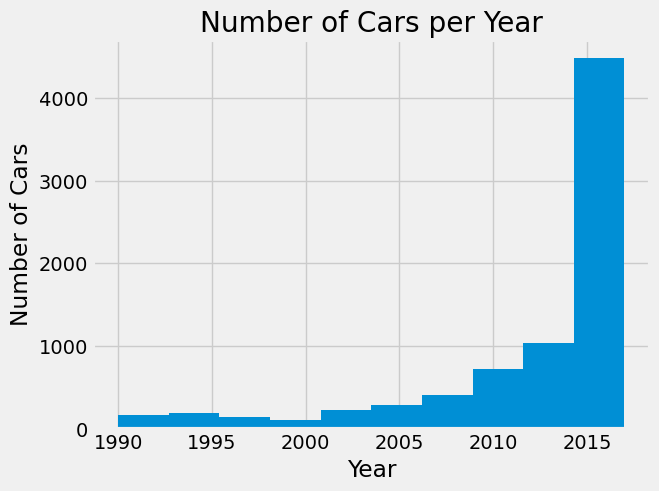

In [19]:
df.year.plot(kind = 'hist');

plt.title('Number of Cars per Year')
plt.ylabel('Number of Cars')
plt.xlabel('Year');

In [20]:
df.engine_hp.value_counts()

240.0    244
285.0    213
200.0    210
210.0    186
300.0    169
        ... 
622.0      1
557.0      1
372.0      1
456.0      1
592.0      1
Name: engine_hp, Length: 327, dtype: int64

In [21]:
# Remove the 1001 value, really different from the others
df.drop(df[df['engine_hp'] == 1001].index, inplace = True)
df.engine_hp.value_counts()

240.0    244
285.0    213
200.0    210
210.0    186
300.0    169
        ... 
572.0      1
361.0      1
661.0      1
557.0      1
535.0      1
Name: engine_hp, Length: 326, dtype: int64

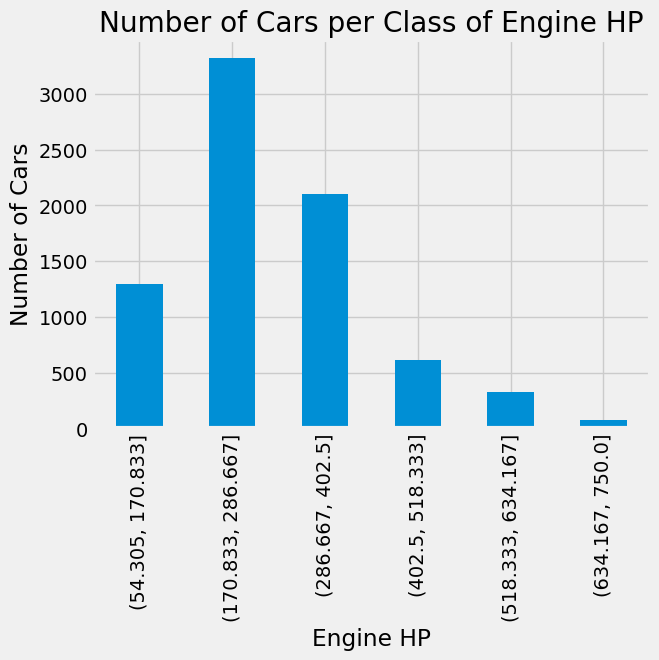

In [22]:
pd.cut(df.engine_hp, bins=6).value_counts().sort_index().plot(kind='bar');

plt.title('Number of Cars per Class of Engine HP')
plt.ylabel('Number of Cars')
plt.xlabel('Engine HP');

In [23]:
df.engine_cylinders.value_counts()

4.0     2887
6.0     2846
8.0     1532
12.0     227
5.0      136
10.0      65
3.0       26
0.0       13
Name: engine_cylinders, dtype: int64

In [24]:
# Remove the Engine Cylinders = 0 because it should be an outlier (a mistake)
df.drop(df[df['engine_cylinders'] == 0].index, inplace = True)
df.engine_cylinders.value_counts()

4.0     2887
6.0     2846
8.0     1532
12.0     227
5.0      136
10.0      65
3.0       26
Name: engine_cylinders, dtype: int64

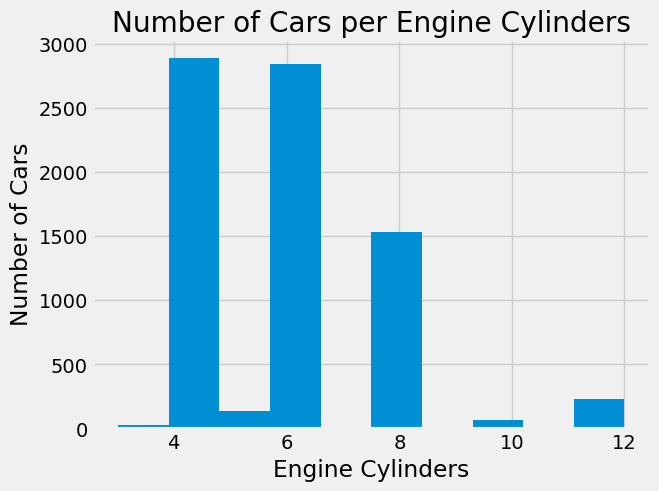

In [25]:
df.engine_cylinders.plot(kind='hist');

plt.title('Number of Cars per Engine Cylinders')
plt.ylabel('Number of Cars')
plt.xlabel('Engine Cylinders');

In [26]:
df.number_of_doors.value_counts()

4.0    5401
2.0    2152
3.0     166
Name: number_of_doors, dtype: int64

In [27]:
# Remove the cars that have 3 Doors
df.drop(df[df['number_of_doors'] == 3].index, inplace = True)
df.number_of_doors.value_counts()

4.0    5401
2.0    2152
Name: number_of_doors, dtype: int64

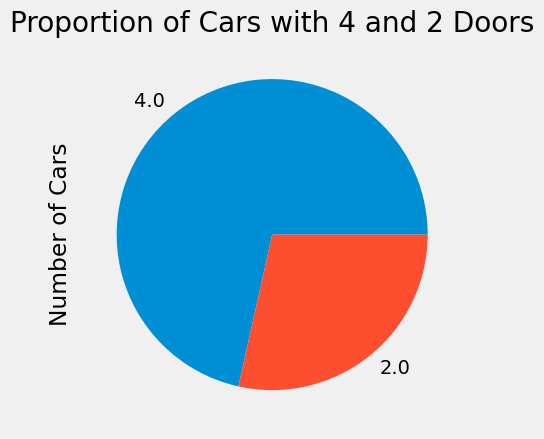

In [28]:
df.number_of_doors.value_counts().plot(kind='pie')

plt.title('Proportion of Cars with 4 and 2 Doors')
plt.ylabel('Number of Cars');

In [29]:
df.highway_mpg.value_counts()

24     652
23     567
26     565
25     564
22     524
28     521
31     391
29     375
27     372
30     372
21     303
19     258
33     257
32     217
20     209
34     186
18     178
17     167
16     108
35     105
36      89
37      83
40      77
15      67
38      65
39      63
41      35
42      30
14      28
43      21
46      21
44      21
48      16
45      14
50      10
47       7
13       5
53       5
12       4
354      1
Name: highway_mpg, dtype: int64

In [30]:
# Remove the 354 value of highway_mpg
df.drop(df[df['highway_mpg'] == 354].index, inplace = True)
df.highway_mpg.value_counts()

24    652
23    567
26    565
25    564
22    524
28    521
31    391
29    375
30    372
27    372
21    303
19    258
33    257
32    217
20    209
34    186
18    178
17    167
16    108
35    105
36     89
37     83
40     77
15     67
38     65
39     63
41     35
42     30
14     28
43     21
46     21
44     21
48     16
45     14
50     10
47      7
13      5
53      5
12      4
Name: highway_mpg, dtype: int64

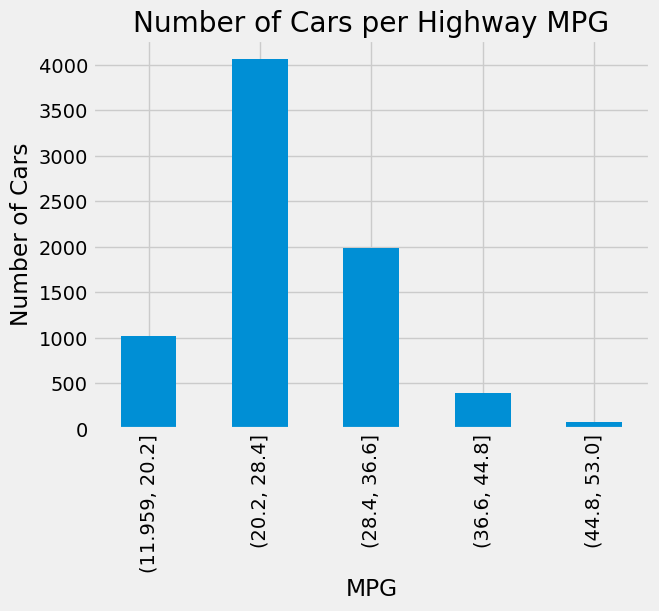

In [31]:
pd.cut(df.highway_mpg, bins=5).value_counts().sort_index().plot(kind='bar');

plt.title('Number of Cars per Highway MPG')
plt.ylabel('Number of Cars')
plt.xlabel('MPG');

In [32]:
df.city_mpg.value_counts()

17    899
18    731
16    692
20    629
19    568
15    562
22    418
21    409
13    352
14    320
23    280
25    260
24    251
12    175
27    130
26    123
11    105
31     87
30     82
28     81
10     72
29     58
9      33
34     20
36     20
40     19
32     19
44     18
41     17
42     17
35     13
43     13
53     13
33     11
54     10
37      8
50      6
39      6
8       6
51      6
49      4
55      3
47      2
58      2
7       1
38      1
Name: city_mpg, dtype: int64

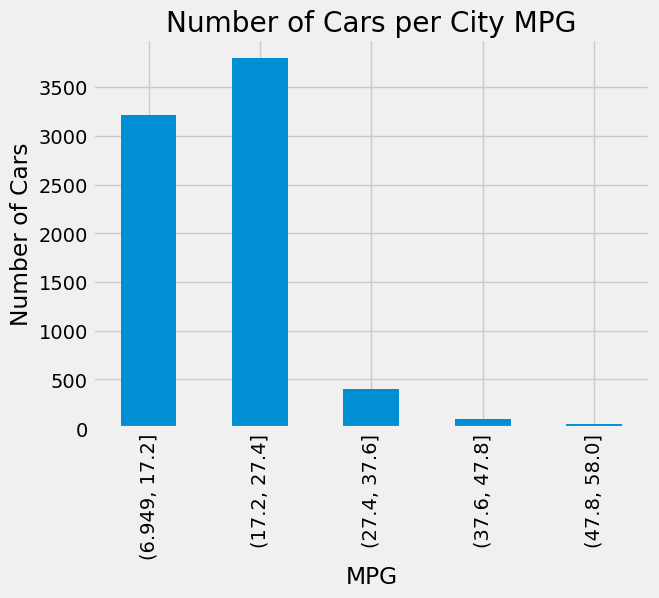

In [33]:
pd.cut(df.city_mpg, bins=5).value_counts().sort_index().plot(kind='bar');

plt.title('Number of Cars per City MPG')
plt.ylabel('Number of Cars')
plt.xlabel('MPG');

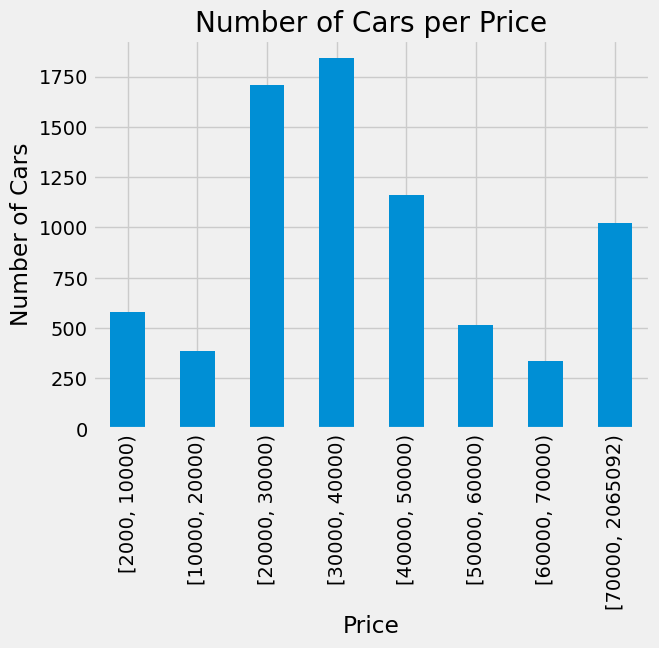

In [34]:
bin_edges = [2000,10000,20000,30000,40000,50000,60000,70000,2065092]

pd.cut(df.price, bin_edges, right = False).value_counts().sort_index().plot(kind='bar');

plt.title('Number of Cars per Price')
plt.ylabel('Number of Cars')
plt.xlabel('Price');

In [35]:
pd.cut(df.price, bin_edges, right = False).value_counts()

[30000, 40000)      1840
[20000, 30000)      1710
[40000, 50000)      1161
[70000, 2065092)    1022
[2000, 10000)        578
[50000, 60000)       516
[10000, 20000)       388
[60000, 70000)       337
Name: price, dtype: int64

In [36]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,price
count,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,7.552000e+03
mean,2012.106727,278.205376,5.813559,3.430085,26.510461,19.409958,5.079938e+04
std,6.276526,115.572977,1.874612,0.902848,5.984697,5.862265,6.366881e+04
min,1990.000000,55.000000,3.000000,2.000000,12.000000,7.000000,2.000000e+03
25%,2010.000000,192.750000,4.000000,2.000000,23.000000,16.000000,2.618875e+04
50%,2015.000000,270.000000,6.000000,4.000000,26.000000,18.000000,3.572500e+04
75%,2016.000000,325.000000,6.000000,4.000000,30.000000,22.000000,4.989250e+04
max,2017.000000,750.000000,12.000000,4.000000,53.000000,58.000000,1.500000e+06


In [37]:
df.describe([0.005, 0.01, 0.05, 0.1, 0.2, 0.8, 0.9, 0.99, 0.995, 0.999])

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,price
count,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,7.552000e+03
mean,2012.106727,278.205376,5.813559,3.430085,26.510461,19.409958,5.079938e+04
std,6.276526,115.572977,1.874612,0.902848,5.984697,5.862265,6.366881e+04
min,1990.000000,55.000000,3.000000,2.000000,12.000000,7.000000,2.000000e+03
0.5%,1991.000000,79.000000,4.000000,2.000000,15.000000,9.000000,2.000000e+03
1%,1991.000000,93.000000,4.000000,2.000000,15.000000,10.000000,2.000000e+03
5%,1996.000000,132.550000,4.000000,2.000000,17.000000,12.000000,2.284650e+03
10%,2003.000000,150.000000,4.000000,2.000000,19.000000,14.000000,1.700410e+04
20%,2009.000000,180.000000,4.000000,2.000000,22.000000,15.000000,2.417000e+04
50%,2015.000000,270.000000,6.000000,4.000000,26.000000,18.000000,3.572500e+04


In [38]:
df.describe(include = 'O')

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,7552,7552,7552,7552,7552,7552,7552,7552
unique,46,701,7,5,4,69,3,14
top,Chevrolet,F-150,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Midsize,4dr SUV
freq,574,122,3320,5475,2597,1068,2957,2053


### Bivariate Analysis

In [39]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'price'],
      dtype='object')

**Price by Make**

In [40]:
df.make.value_counts().nlargest(10)

Chevrolet        574
Volkswagen       411
Ford             401
Cadillac         396
Mercedes-Benz    336
Infiniti         328
Audi             320
BMW              320
Nissan           308
Dodge            298
Name: make, dtype: int64

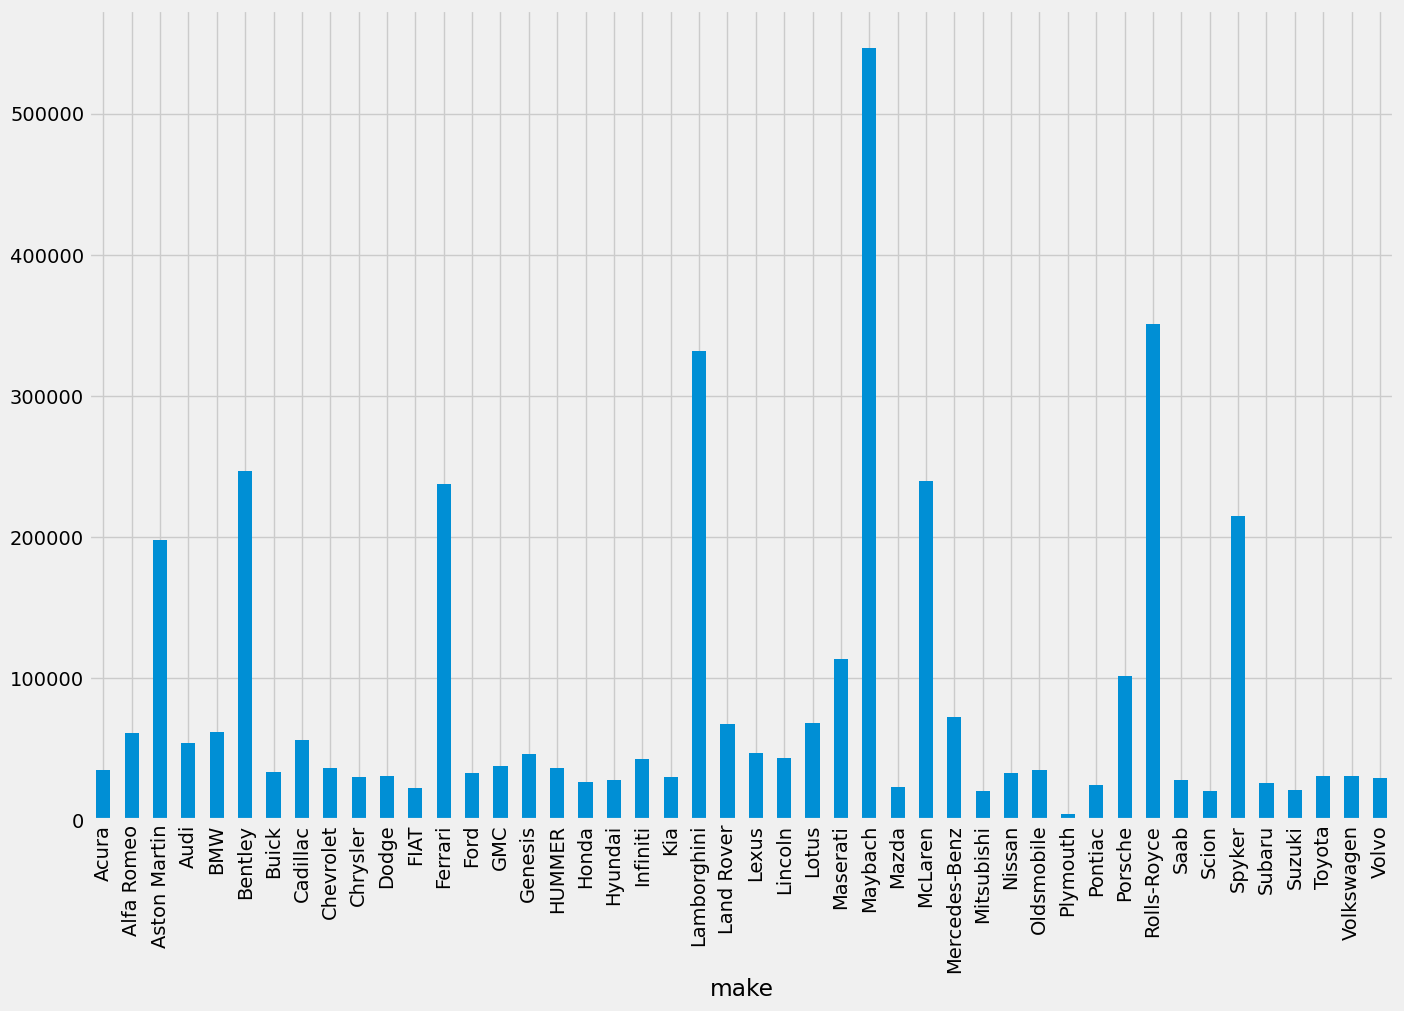

In [41]:
df.groupby('make')['price'].mean().plot(kind='bar', figsize = (15,10));

**Price by Engine Fuel Type**

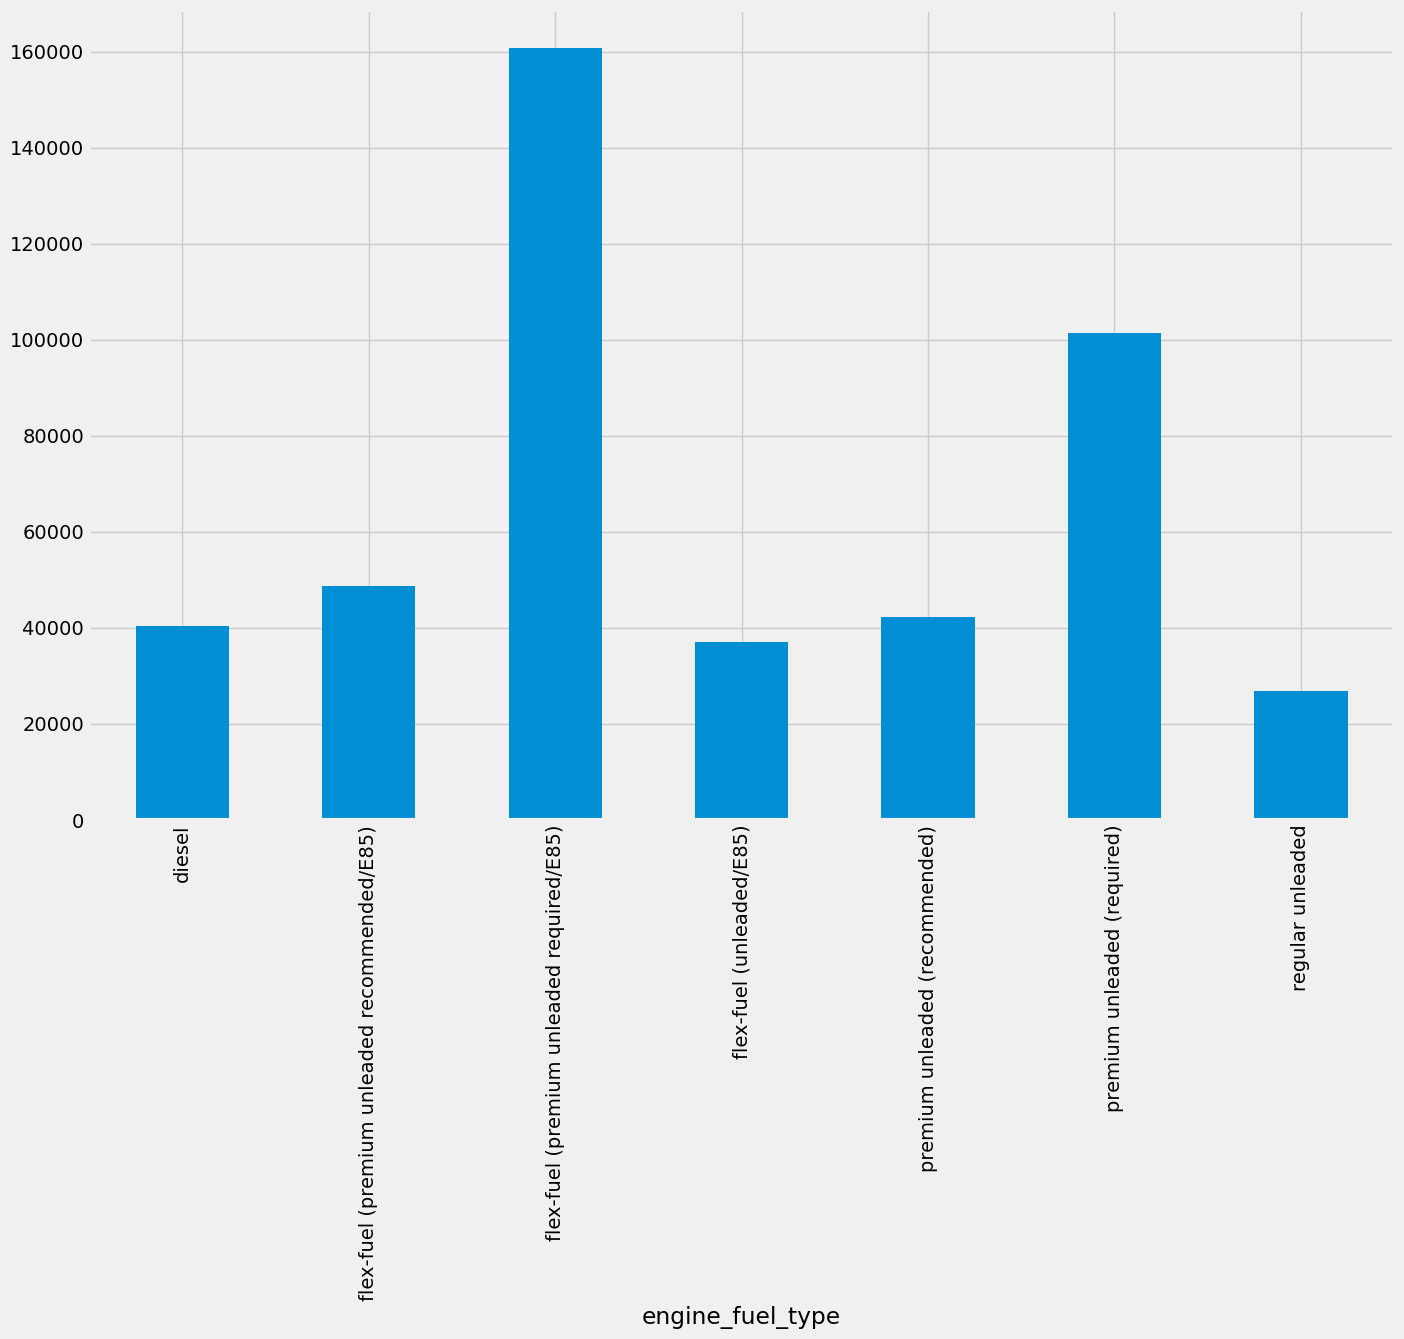

In [42]:
df.groupby('engine_fuel_type')['price'].mean().plot(kind='bar', figsize = (15,10));

**Correlation between values**

In [43]:
df.corr()['price'].round(2)

year                0.15
engine_hp           0.68
engine_cylinders    0.63
number_of_doors    -0.21
highway_mpg        -0.36
city_mpg           -0.35
price               1.00
Name: price, dtype: float64

In [44]:
df.drop('price', axis=1).corrwith(df['price']).round(2)
# Without the 1 for Price

year                0.15
engine_hp           0.68
engine_cylinders    0.63
number_of_doors    -0.21
highway_mpg        -0.36
city_mpg           -0.35
dtype: float64

In [45]:
corr = df.corr().round(2)
corr

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,price
year,1.00,0.24,-0.05,0.19,0.28,0.22,0.15
engine_hp,0.24,1.00,0.82,-0.21,-0.59,-0.61,0.68
engine_cylinders,-0.05,0.82,1.00,-0.19,-0.70,-0.67,0.63
number_of_doors,0.19,-0.21,-0.19,1.00,0.12,0.16,-0.21
highway_mpg,0.28,-0.59,-0.70,0.12,1.00,0.91,-0.36
city_mpg,0.22,-0.61,-0.67,0.16,0.91,1.00,-0.35
price,0.15,0.68,0.63,-0.21,-0.36,-0.35,1.00


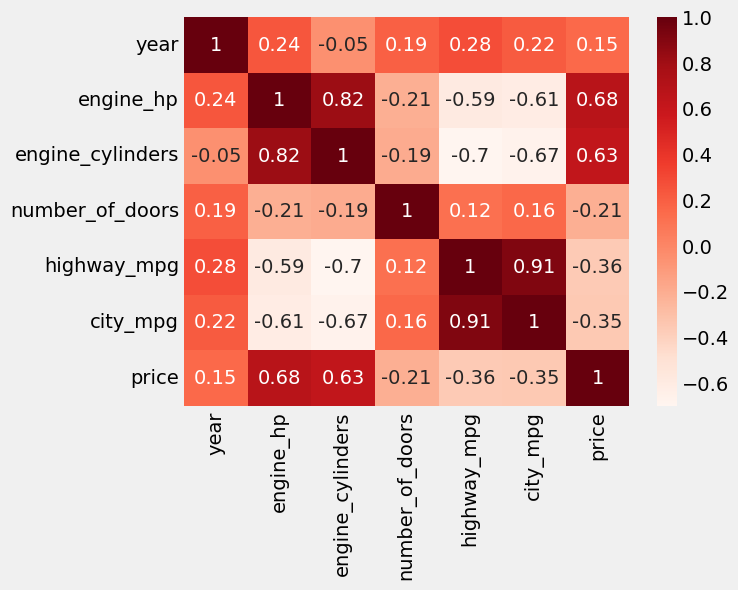

In [46]:
sns.heatmap(corr, annot = True, cmap = 'Reds');

<AxesSubplot:>

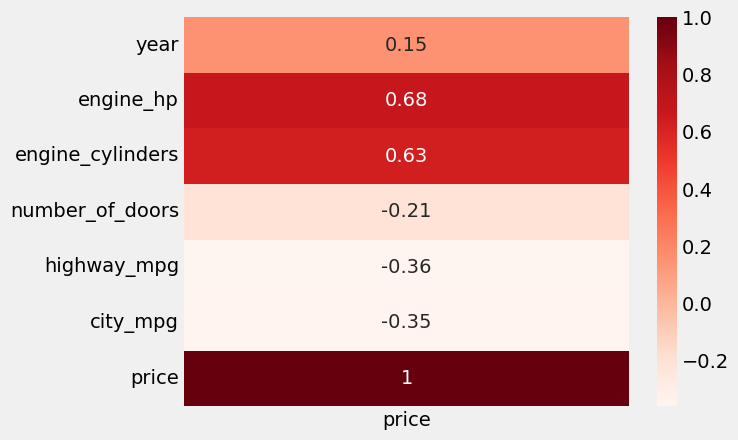

In [47]:
price = df.corr()['price'].round(2).to_frame()
sns.heatmap(price, annot=True, cmap = 'Reds')

### Data Prep for Modelling

**Separate the values of Market Category**

In [48]:
# Splipt the 'market_category' column by a comma and expand the resulting Dataframe
df_expanded = df['market_category'].str.split(',', expand=True)

# Copy the dataframe
df2 = df[:].copy()

# Create a new DataFrame with one column for each unique value in the expanded DataFrame
df_expanded = pd.get_dummies(df_expanded.stack()).sum(level=0)

# Concatenate the original DataFrame and the expanded DataFrame
df2 = pd.concat([df, df_expanded], axis = 1)

In [49]:
df2.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'price', 'Crossover', 'Diesel', 'Exotic',
       'Factory Tuner', 'Flex Fuel', 'Hatchback', 'High-Performance', 'Hybrid',
       'Luxury', 'Performance'],
      dtype='object')

In [50]:
# Drop Market Category category
del df2['market_category']
df2.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'price', 'Crossover', 'Diesel', 'Exotic', 'Factory Tuner',
       'Flex Fuel', 'Hatchback', 'High-Performance', 'Hybrid', 'Luxury',
       'Performance'],
      dtype='object')

**Conver the other categorical value to numerical**

In [51]:
df2 = pd.get_dummies(df2, columns = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
                                     'vehicle_size', 'vehicle_style'])

In [52]:
df2.columns

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'price', 'Crossover', 'Diesel', 'Exotic',
       ...
       'vehicle_style_Cargo Minivan', 'vehicle_style_Convertible',
       'vehicle_style_Convertible SUV', 'vehicle_style_Coupe',
       'vehicle_style_Crew Cab Pickup', 'vehicle_style_Extended Cab Pickup',
       'vehicle_style_Passenger Minivan', 'vehicle_style_Regular Cab Pickup',
       'vehicle_style_Sedan', 'vehicle_style_Wagon'],
      dtype='object', length=797)

**Rename again the columns**

In [53]:
df2.columns = df2.columns.str.lower()

In [54]:
df2.columns = df2.columns.str.replace(' ','_')

In [55]:
df2.columns = df2.columns.str.replace('-','_')

In [56]:
df2.columns

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'price', 'crossover', 'diesel', 'exotic',
       ...
       'vehicle_style_cargo_minivan', 'vehicle_style_convertible',
       'vehicle_style_convertible_suv', 'vehicle_style_coupe',
       'vehicle_style_crew_cab_pickup', 'vehicle_style_extended_cab_pickup',
       'vehicle_style_passenger_minivan', 'vehicle_style_regular_cab_pickup',
       'vehicle_style_sedan', 'vehicle_style_wagon'],
      dtype='object', length=797)

**Train Test Splitting**

In [57]:
# Data Prep
from sklearn.model_selection import train_test_split

In [58]:
# Splitting the Data
x = df2.drop(columns = 'price')
y = df2['price']

In [59]:
# Doing train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [60]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (6041, 796)
y_train:  (6041,)
x_test:  (1511, 796)
y_test:  (1511,)


**Standardization**

In [61]:
# Data Prep
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
x_train = scaler.fit_transform(x_train)

In [64]:
x_test = scaler.transform(x_test)

In [65]:
x_train

array([[ 0.45507982,  1.07695205,  1.18910949, ..., -0.15346445,
         1.78749514, -0.22251641],
       [ 0.45507982, -0.241646  ,  0.11011431, ..., -0.15346445,
        -0.55944208, -0.22251641],
       [ 0.45507982, -1.12649469, -0.96888088, ..., -0.15346445,
        -0.55944208, -0.22251641],
       ...,
       [ 0.61515536,  0.53910285,  0.11011431, ..., -0.15346445,
        -0.55944208, -0.22251641],
       [ 0.61515536, -0.93564497, -0.96888088, ..., -0.15346445,
        -0.55944208, -0.22251641],
       [ 0.45507982,  0.20945334, -0.96888088, ..., -0.15346445,
        -0.55944208, -0.22251641]])

In [66]:
x_test

array([[ 0.77523089, -0.05079628, -0.96888088, ..., -0.15346445,
        -0.55944208, -0.22251641],
       [-3.22665745, -0.08549623,  1.18910949, ..., -0.15346445,
         1.78749514, -0.22251641],
       [-2.26620425, -0.80552016, -0.96888088, ..., -0.15346445,
        -0.55944208, -0.22251641],
       ...,
       [ 0.29500429,  0.34825313,  0.11011431, ..., -0.15346445,
        -0.55944208, -0.22251641],
       [ 0.61515536, -1.21324456, -0.96888088, ..., -0.15346445,
        -0.55944208, -0.22251641],
       [ 0.61515536, -0.83154512, -0.96888088, ..., -0.15346445,
        -0.55944208, -0.22251641]])

## Model Building - Linear

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
linear = LinearRegression()

In [69]:
linear.fit(x_train, y_train)

LinearRegression()

In [70]:
linear.score(x_train, y_train)

0.9897375246898198

In [71]:
predictions = linear.predict(x_train)

**Train Data Predictions**

In [72]:
# Combine the actual data and predictions
output = pd.DataFrame({'actual': y_train,
                       'predictions': predictions})

# Sort the index
output = output.sort_index()

# New output
output.head()

,actual,predictions
1,40650,46227.371343
2,36350,35528.371343
3,29450,27612.371343
4,34500,38255.371343
5,31200,28452.371343


In [73]:
# Visualize the Predictions

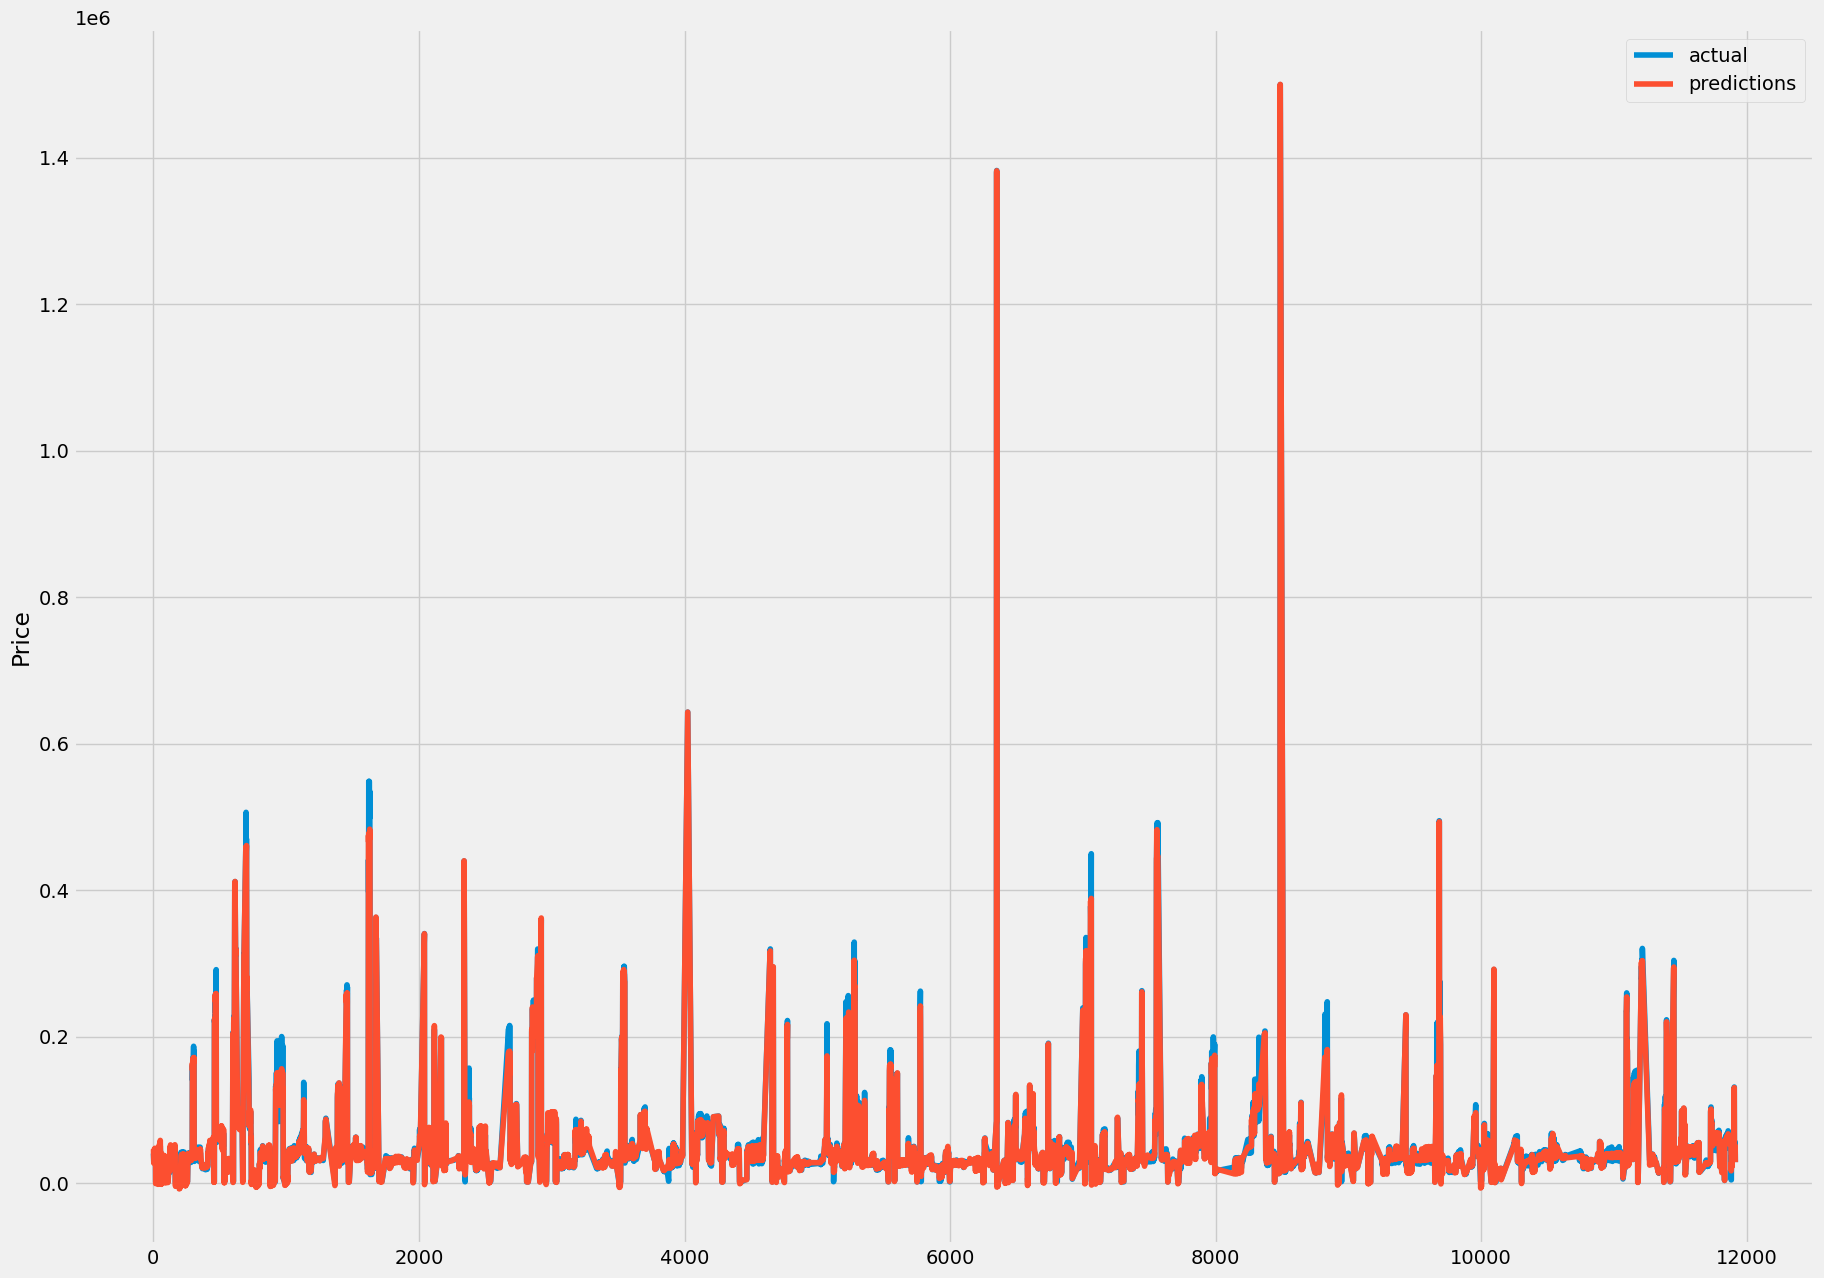

In [74]:
plt.figure(figsize = (20,15))

plt.plot(output['actual'], label = 'actual')
plt.plot(output['predictions'], label = 'predictions')

plt.ylabel('Price')

plt.legend()

plt.show();

**Test Data Predictions**

In [75]:
# Data Prep
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [76]:
linear.score(x_test, y_test)

-3.6376639884211635e+22

In [77]:
# Predictions for test data

test_predictions = np.round(linear.predict(x_test),1)

# Calculate the score
print('R^2 of test: {:.2f}'.format(linear.score(x_test, y_test)))

# Accuracy metrics
print('RMSE of test: {:.2f}'.format(mean_squared_error(y_test, test_predictions, squared = False)))
print('MAE of test: {:.2f}'.format(mean_absolute_error(y_test, test_predictions)))

R^2 of test: -36376639884211634831360.00
RMSE of test: 11338624864382512.00
MAE of test: 977557038271170.62


In [78]:
## Model Score of test data is really bad opposed to a really good one for training data. This actually makes sense due
## to the amount of variables that we are using. It is clearly a problem of overfitting.

## Model Building - KNeihborsRegressor

In [79]:
# Prep the data
from sklearn.neighbors import KNeighborsRegressor

In [80]:
knn = KNeighborsRegressor(n_neighbors = 1)

# Fit the model
knn.fit(x_train, y_train)

# Record training set accuracy
print(knn.score(x_train, y_train))

# Record test accuracy
print(knn.score(x_test, y_test))

0.9983745363490468
0.9087288866648291


**Try several values for K**

In [81]:
# empty list that will be populated
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 20
neighbors_settings = range(1,20)

for n_neighbors in neighbors_settings:
    
    #build the model
    knn = KNeighborsRegressor(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(knn.score(x_test, y_test))

In [82]:
print(test_accuracy)
print('--------')
print(training_accuracy)

[0.9087288866648291, 0.8923530972526704, 0.8657437984316, 0.8277374365442819, 0.7902072664304776, 0.7562580781584595, 0.7242459747181663, 0.6948178216870731, 0.6687205007653403, 0.6502048989855402, 0.6325586358686899, 0.6174754219768399, 0.6035777282505246, 0.5899483356081416, 0.5772049002695083, 0.5644959367261662, 0.552511189636601, 0.540771606773417, 0.5302198835105683]
--------
[0.9983745363490468, 0.9709476641932857, 0.9270881075734249, 0.8785069350793483, 0.8346068842141288, 0.7973177274382149, 0.7639521166302055, 0.7332348346412905, 0.704608021472286, 0.6809243995203144, 0.6596138887568828, 0.6398348943615451, 0.621520816847583, 0.6045207873957916, 0.5885737157679084, 0.5741689670855847, 0.560880768979503, 0.5478450494666471, 0.5353371790805208]


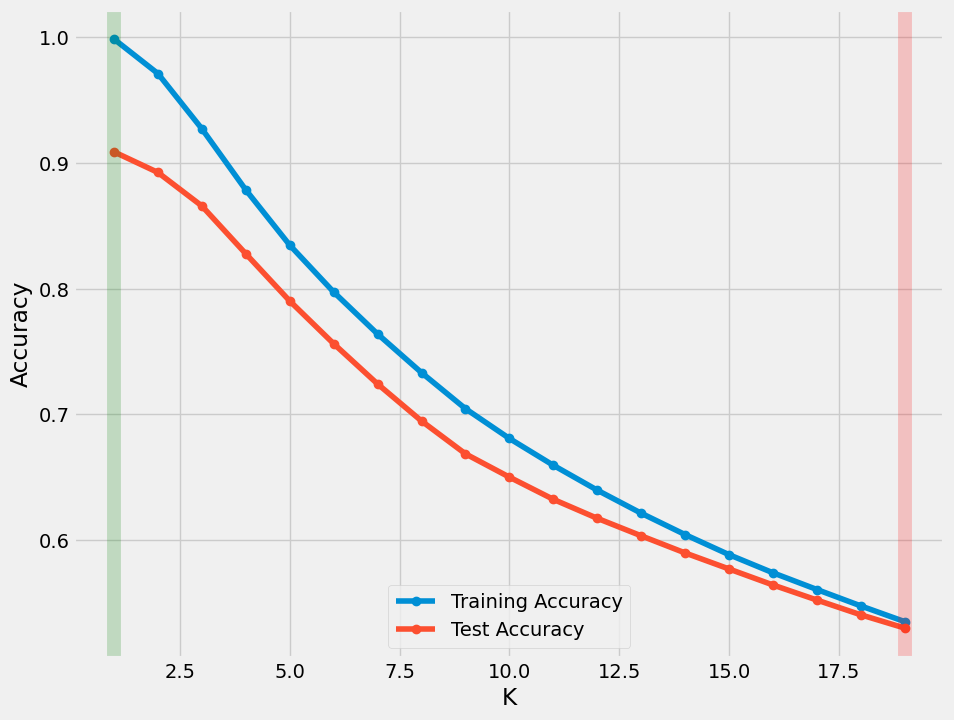

In [83]:
## Visualize
plt.figure(figsize = (10,8))

plt.plot(neighbors_settings, training_accuracy, marker = 'o', label = 'Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, marker = 'o', label = 'Test Accuracy')

# highlight the max and min accuracy values
plt.axvline(x = test_accuracy.index(max(test_accuracy))+1, linewidth = 10, alpha = 0.2, color ='green')
plt.axvline(x = test_accuracy.index(min(test_accuracy))+1, linewidth = 10, alpha = 0.2, color ='red')

plt.ylabel('Accuracy')
plt.xlabel('K')

plt.legend();

In [84]:
# Is it ok to use K = 1 or is it wrong? We are going to have big variance with this, should we opt for K = 2?

**Using K = 2**

In [85]:
knn = KNeighborsRegressor(n_neighbors = 2)

# Fit the model
knn.fit(x_train, y_train)

# Record training set accuracy
print(knn.score(x_train, y_train))

# Record test accuracy
print(knn.score(x_test, y_test))

0.9709476641932857
0.8923530972526704


In [86]:
predictionsknn = knn.predict(x_train)

In [87]:
# # combine the actual data and predictions
outputknn = pd.DataFrame({"actualknn": y_train, 
                       "predictionsknn": predictionsknn})

# # sort the index
outputknn = outputknn.sort_index()

# # new output
outputknn.head()

,actualknn,predictionsknn
1,40650,42525.0
2,36350,37825.0
3,29450,30325.0
4,34500,35850.0
5,31200,30325.0


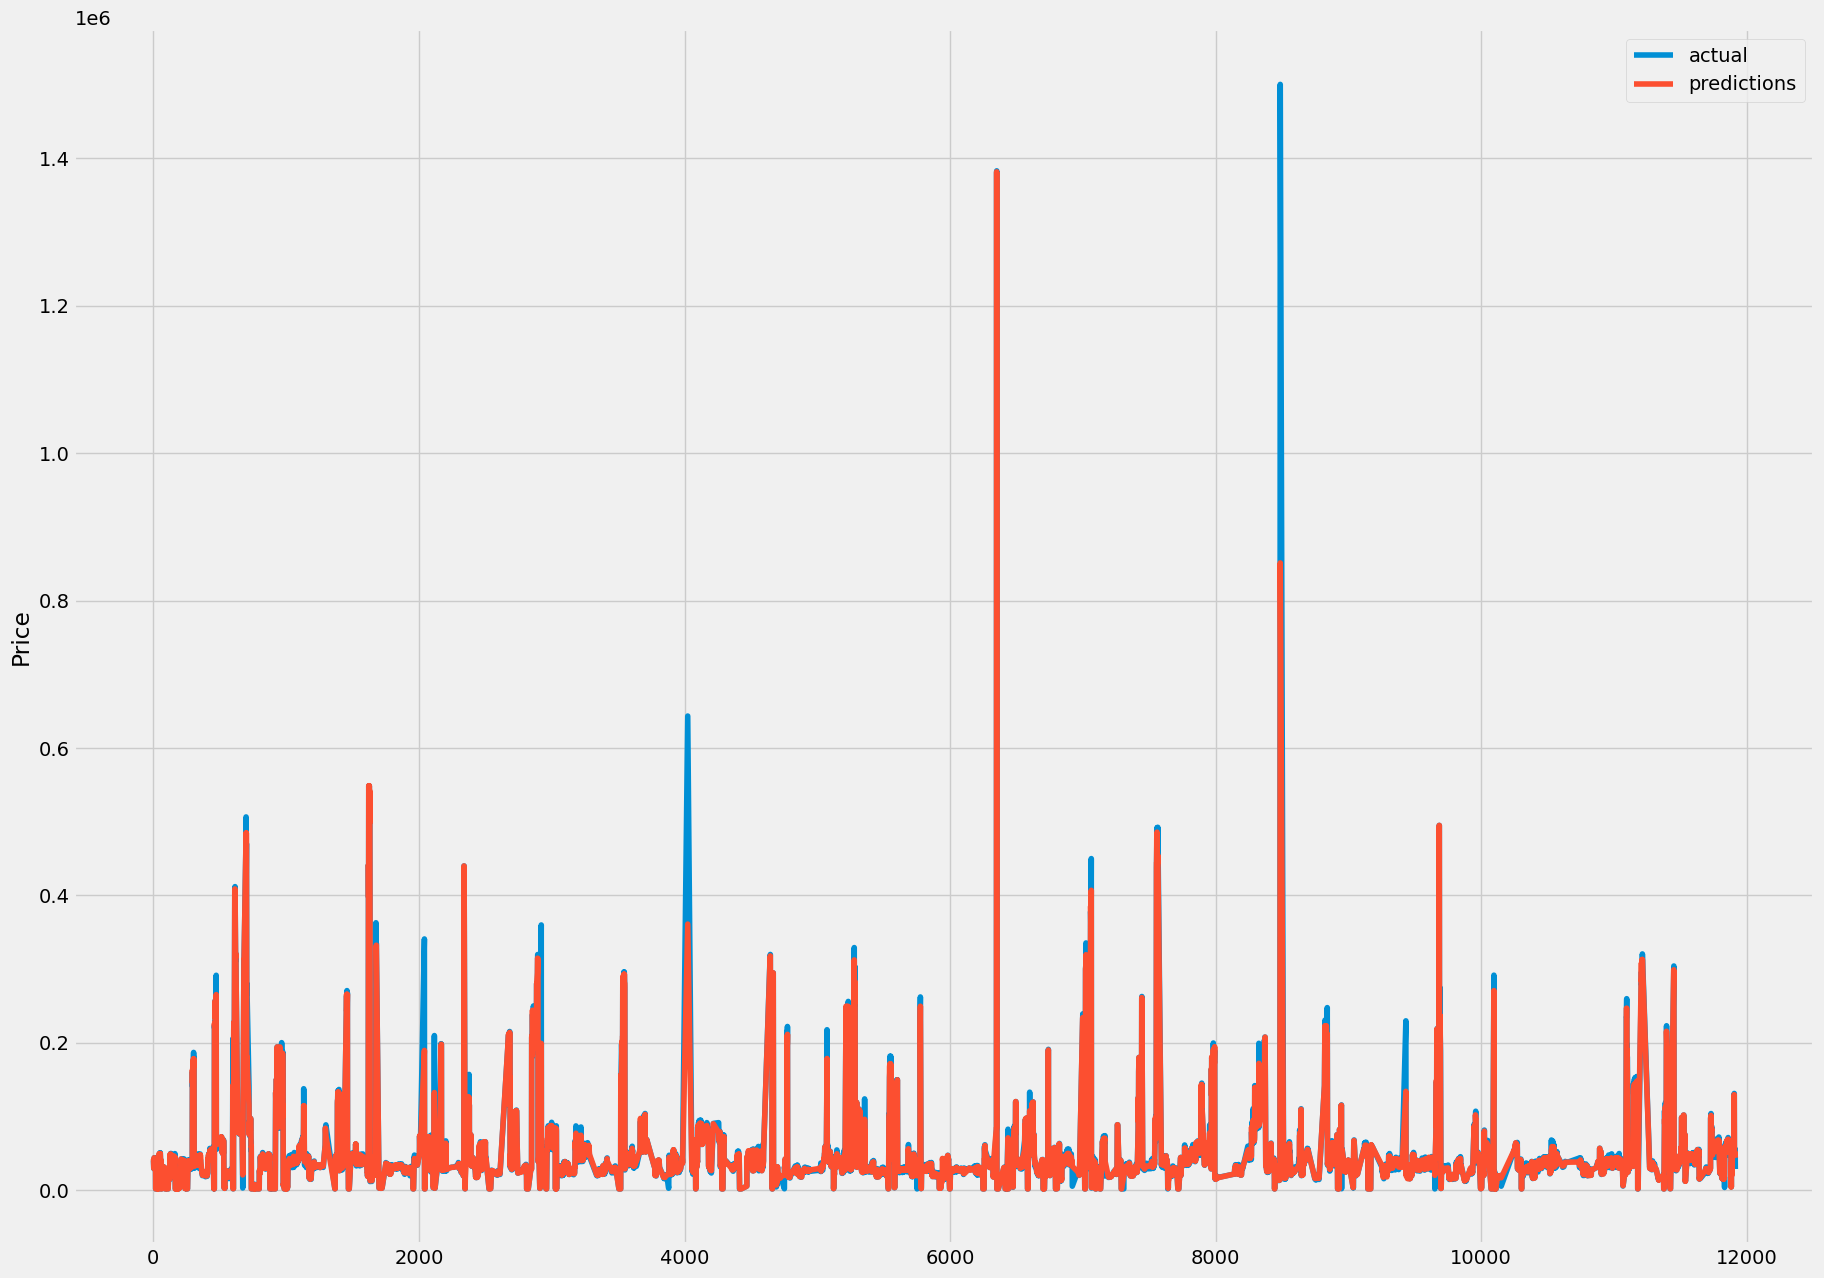

In [88]:
plt.figure(figsize = (20,15))

plt.plot(outputknn['actualknn'], label = 'actual')
plt.plot(outputknn['predictionsknn'], label = 'predictions')

plt.ylabel('Price')

plt.legend()

plt.show();

In [89]:
test_predictionsknn = np.round(knn.predict(x_test),1)

print("R^2 of test: {:.2f}".format(knn.score(x_test, y_test)))
print("RMSE of test: {:.2f}".format(mean_squared_error(y_test, test_predictionsknn, squared = False)))
print("MAE of test: {:.2f}".format(mean_absolute_error(y_test, test_predictionsknn)))

R^2 of test: 0.89
RMSE of test: 19505.18
MAE of test: 6086.11


In [90]:
test_outputknn = pd.DataFrame({"actualknn": y_test, 
                               "test_predictionsknn": test_predictionsknn})

# # sorting index
test_outputknn = test_outputknn.sort_index()
test_outputknn.head()

,actualknn,test_predictionsknn
0,46135,83325.0
8,36900,35850.0
15,48250,37200.0
19,2000,2000.0
22,2000,2000.0


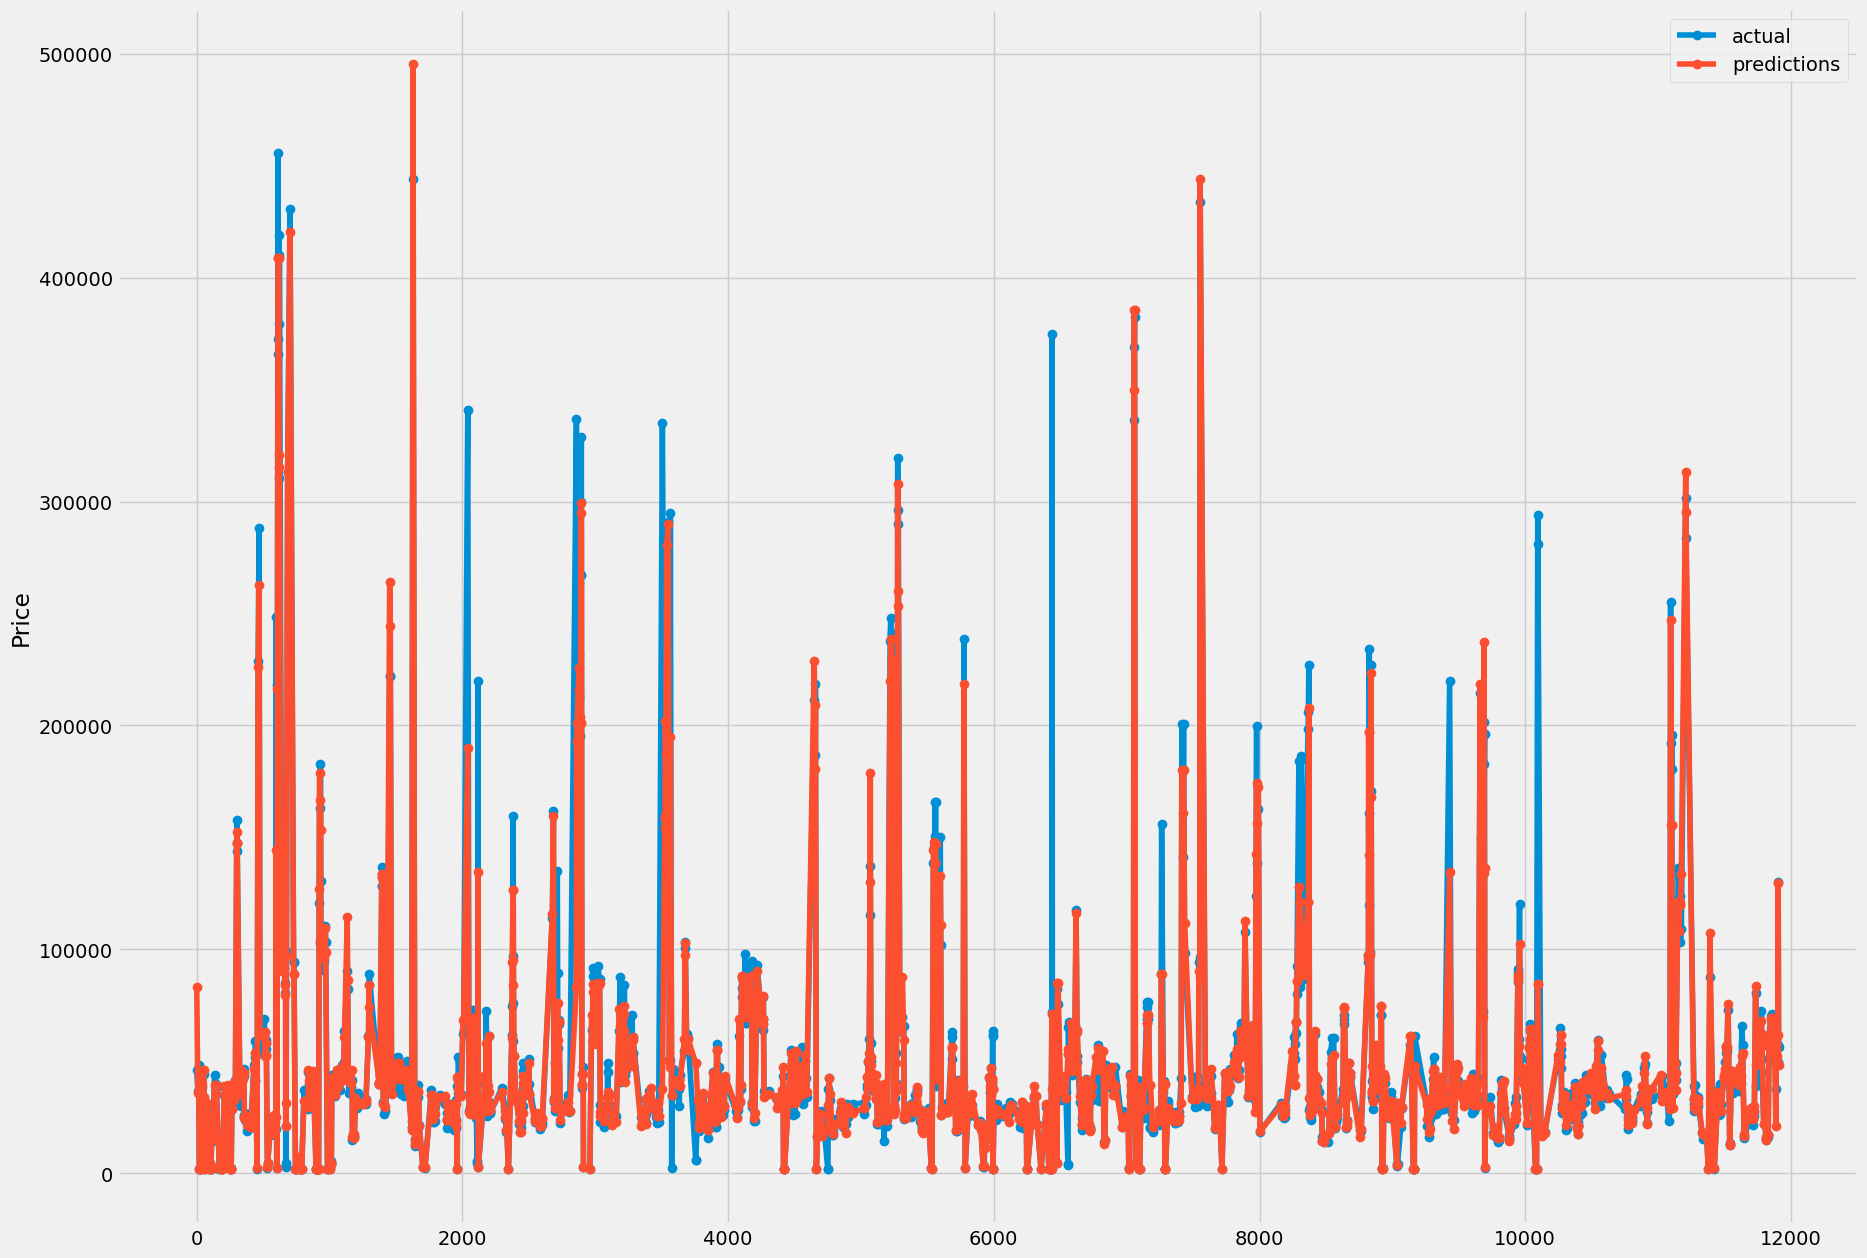

In [91]:
plt.figure(figsize = (20,15))

plt.plot(test_outputknn["actualknn"], marker = "o", label = "actual")
plt.plot(test_outputknn["test_predictionsknn"], marker = "o", label = "predictions")

plt.ylabel("Price")

plt.legend()

plt.show();